**I . Statistical Methods to check for Normality.**
* Shapiro-Wilk Test
* D'Augustino's k2 Test
* Anderson Darling Test

**Interpretation of Tests :**
* Assumption(HO) : The distribution was drawn from Gaussian Distribution.
* If **p-value <= alpha**,siginificant result,reject null hypothesis,**not Gaussian** (H1)
* If **p-value > alpha**,not siginificant result,failed to reject null hypothesis,**Gaussian** (HO)

1.Shapiro-Wilk Test

In [0]:
def getShapiroScore(data,alpha=0.05):
  from scipy.stats import shapiro
  statistic,p = shapiro(data)
  print("Shapiro-Wilk - Statistic-Score=%.3f,p-value=%.3f"%(statistic,p))
  if p>alpha:
    print("Sample is Gaussian")
  else:
    print("Sample is Not Gaussian")
  print('--------------------------')

2.D'Augustino's k2 Test

In [0]:
def getAugustinoScore(data,alpha=0.05):
  from scipy.stats import normaltest
  statistic,p = normaltest(data)
  print("D'Augustino's k2 -Statistic-Score=%.3f,p-value=%.3f"%(statistic,p))
  if p>alpha:
    print("Sample is Gaussian")
  else:
    print("Sample is Not Gaussian")
  print('--------------------------')

3.Anderson Darling Test

In [0]:
def getAndersonScore(data,alpha=0.05):
  from scipy.stats import anderson
  result = anderson(data)
  print("Anderson Darling -Statistic-Score=%.3f"%(result.statistic))
  p=0
  for i in range(len(result.critical_values)):
    sl,cv = result.significance_level[i],result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print("Sample is Gaussian Sig.Level = %.3f,Cric.Val = %.3f"%(sl,cv))
    else:
      print("Sample is NOT Gaussian Sig.Level = %.3f,Cric.Val = %.3f"%(sl,cv))
  print('--------------------------')

In [0]:
#test Data
from numpy.random import seed
from numpy.random import rand#uniform Dist
from numpy.random import randn#normal Dist
seed(1)
mean = 50
var = 5
data = var * randn(100) + mean

In [45]:
getShapiroScore(data)
getAugustinoScore(data)
getAndersonScore(data)

Shapiro-Wilk - Statistic-Score=0.992,p-value=0.822
Sample is Gaussian
--------------------------
D'Augustino's k2 -Statistic-Score=0.102,p-value=0.950
Sample is Gaussian
--------------------------
Anderson Darling -Statistic-Score=0.220
Sample is Gaussian Sig.Level = 15.000,Cric.Val = 0.555
Sample is Gaussian Sig.Level = 10.000,Cric.Val = 0.632
Sample is Gaussian Sig.Level = 5.000,Cric.Val = 0.759
Sample is Gaussian Sig.Level = 2.500,Cric.Val = 0.885
Sample is Gaussian Sig.Level = 1.000,Cric.Val = 1.053
--------------------------


**II . Visual Normality Checks**

1.Histogram -  To check the graph for gaussian like shape

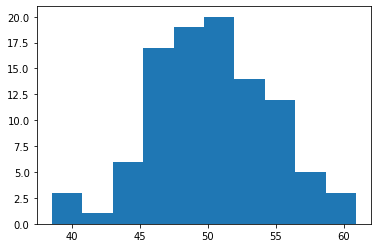

In [38]:
from matplotlib import pyplot as plt
plt.hist(data)
plt.show()

2. Quantile-Quantile Plot - The more points along the line,the more gaussian dist is.

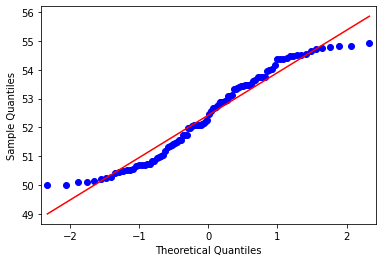

In [43]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data,line='s')
plt.show()